<a href="https://polly.elucidata.io/manage/workspaces?action=open_polly_notebook&amp;source=github&amp;path=ElucidataInc%2Fpolly-python%2Fblob%2Fmain%2FDiscover%2Fmeta_analysis_transcriptomics%2FCohort+conditions+where+%27mycn%27+gene+is+differentially+expressed.ipynb&amp;kernel=elucidata%2FPython+3.10&amp;machine=medium" target="_parent"><img alt="Open in Polly" src="https://elucidatainc.github.io/PublicAssets/open_polly.svg"/></a>


## Objective:- 
1. Identify GEO datasets where 'mycn' gene is differentially expressed.
2. Fetch curated data from GEO for those datasets to identify disease conditions where 'mycn' was differentially expressed.

## Install polly-python

In [2]:
sudo pip3 install polly-python --quiet

ERROR: awscli 1.18.178 has requirement botocore==1.19.18, but you'll have botocore 1.26.10 which is incompatible.
ERROR: awscli 1.18.178 has requirement s3transfer<0.4.0,>=0.3.0, but you'll have s3transfer 0.5.2 which is incompatible.
ERROR: black 22.6.0 has requirement click>=8.0.0, but you'll have click 7.1.2 which is incompatible.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Import libraries and OA configuration

In [3]:
import os
from polly.auth import Polly
from polly.omixatlas import OmixAtlas

AUTH_TOKEN=(os.environ['POLLY_REFRESH_TOKEN']) # Obtain authentication tokens
Polly.auth(AUTH_TOKEN)

#Defining omixatlas object
omixatlas = OmixAtlas()

## Tables in the GDX atlas

In [4]:
q = "SHOW TABLES IN gdx_atlas"
omixatlas.query_metadata(q)

Query execution succeeded (time taken: 1.51 seconds, data scanned: 0.000 MB)
Fetched 2 rows


,table_name
0,gdx_atlas.datasets
1,gdx_atlas.features


## Get the schema of the GDX atlas

In [5]:
gdx_schema = omixatlas.get_schema('gdx_atlas', schema_level=['dataset'])
gdx_schema.dataset

,Source,Datatype,Field Name,Field Description,Field Type,Is Curated,Is Array
0,all,all,bucket,S3 bucket in which the data file resides,text,False,False
1,all,all,cohort_separability,Cohort separability in PCA,float,False,False
2,all,all,condition_column,Condition column from sample metadata,text,False,False
3,all,all,condition_control,condition_column value for control,text,False,True
4,all,all,condition_perturbation,condition_column value for perturbation,text,False,True
5,all,all,curated_cell_line,curated_cell_line,text,False,True
6,all,all,curated_cell_type,curated_cell_type,text,False,True
7,all,all,curated_disease,curated_disease,text,False,True
8,all,all,curated_drug,curated_drug,text,False,True
9,all,all,curated_gene,curated_gene,text,False,True


## Define params

In [6]:
PARAMS = {
    "GENE" : "mycn",  
    "PADJ_CUTOFF": 0.05, # 0 --> 1
    "LOG2FC_CUTOFF": 1.0, # absolute number
}
PARAMS

{'GENE': 'mycn', 'PADJ_CUTOFF': 0.05, 'LOG2FC_CUTOFF': 1.0}

## Query GDX atlas

### 1. Datasets table

In [7]:
q = """SELECT 
              dataset_id,
              src_dataset_id, 
              src_description,
              condition_column,
              condition_control,
              condition_perturbation
       FROM gdx_atlas.datasets"""
df = omixatlas.query_metadata(q, query_api_version='v2')
print(df.shape)
df.head()

Query execution succeeded (time taken: 2.02 seconds, data scanned: 0.279 MB)
Fetched 5120 rows
(5120, 6)


,dataset_id,src_dataset_id,src_description,condition_column,condition_control,condition_perturbation
0,GSE25014_GPL570-2022-07-08-05-55-59,GSE25014_GPL570,Gene expression data of endothelium exposed to...,kw_curated_drug,[none],[heme]
1,GSE25088_GPL1261-2022-07-08-05-56-00,GSE25088_GPL1261,PPARg and IL-4-induced gene expression data fr...,kw_curated_drug,[none],[rosiglitazone]
2,GSE25098_GPL8321-2022-06-21-08-26-43,GSE25098_GPL8321,Rhabdomyosarcoma can be initiated in activated...,kw_curated_disease,[Normal],[Rhabdomyosarcoma]
3,GSE25101_GPL6947-2022-06-21-08-26-44,GSE25101_GPL6947,Expression profiling in whole blood in ankylos...,kw_curated_disease,[Normal],"[Spondylitis, Ankylosing]"
4,GSE25123_GPL1261-2022-07-08-05-56-01,GSE25123_GPL1261,PPARg and IL-4-induced gene expression data fr...,kw_curated_drug,[none],[rosiglitazone]


### 2. Features table

In [8]:
q = """SELECT *
       FROM gdx_atlas.features LIMIT 5"""
df = omixatlas.query_metadata(q, query_api_version='v2')
print(df.shape)
df.head()

Query execution succeeded (time taken: 3.42 seconds, data scanned: 57.127 MB)
Fetched 5 rows
(5, 17)


,avg_exp,p_value,src_repo,id_key,b,src_uri,gene,bh,src_dataset_id,version,log_fc,adj_p_val,timestamp_,t,data_id,name,is_current
0,6.979292,0.000374,gdx_atlas,kw_row_id,-3.967370,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,0.886917,0.999932,1657277152614,5.003541,kiaa1161,KIAA1161,True
1,3.884633,0.000423,gdx_atlas,kw_row_id,-3.974604,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,1.883600,0.999932,1657277152614,4.927506,cd14,CD14,True
2,2.566425,0.000457,gdx_atlas,kw_row_id,-3.979209,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,0.566650,0.999932,1657277152614,4.880098,dach1,DACH1,True
3,9.535658,0.000931,gdx_atlas,kw_row_id,-4.024778,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,-0.545550,0.999932,1657277152614,-4.447537,wars2,WARS2,True
4,5.316342,0.001668,gdx_atlas,kw_row_id,-4.065846,polly:data://gdx_atlas/data/GSE96689_GPL23185-...,NaN,0.999932,GSE96689_GPL23185-2022-07-08-06-15-01,0,1.298983,0.999932,1657277152614,4.104426,fam53a,FAM53A,True


## Search datasets with a given gene name along with pval and log2fc cutoffs

In [9]:
q = """ SELECT 
            datasets.dataset_id, 
            datasets.src_description,
            datasets.condition_column, 
            array_join(datasets.condition_control,'') AS condition_control,
            array_join(datasets.condition_perturbation,'') AS condition_perturbation,
            features.data_id,
            features.avg_exp,
            features.p_value,
            features.adj_p_val,
            features.log_fc
        FROM gdx_atlas.datasets as datasets
        JOIN (
            SELECT src_dataset_id, data_id, avg_exp, p_value, adj_p_val, log_fc
            FROM gdx_atlas.features
            WHERE
                data_id='{}'
            AND
                adj_p_val<{}
            AND
                ABS(log_fc)>{}
        ) AS features
        ON datasets.dataset_id=features.src_dataset_id
    """.format(PARAMS['GENE'], PARAMS['PADJ_CUTOFF'], PARAMS['LOG2FC_CUTOFF'])

df = omixatlas.query_metadata(q, query_api_version='v2')
print(df.shape)
df.head()

Query execution succeeded (time taken: 10.46 seconds, data scanned: 340.499 MB)
Fetched 233 rows
(233, 10)


,dataset_id,src_description,condition_column,condition_control,condition_perturbation,data_id,avg_exp,p_value,adj_p_val,log_fc
0,GSE24256_GPL4134-2022-07-08-05-55-48,Liver gene expression analysis of male and fem...,kw_curated_drug,none,dexamethasone,mycn,5.935375,0.008061,0.045596,-1.652117
1,GSE60502_GPL96-2022-06-21-08-09-50,Gene expression profiling of 18 hepatocellular...,kw_curated_disease,Normal,"Carcinoma, Hepatocellular",mycn,4.931150,0.004889,0.021399,1.459778
2,GSE76694_GPL14745-2022-07-08-06-10-13,Transcriptomic effects of prenatal exposure to...,kw_curated_drug,none,betamethasone,mycn,1.552133,0.000058,0.000315,-1.352388
3,GSE141253_GPL570-2022-07-08-05-50-39,Development of a neural rosette formation assa...,kw_curated_drug,none,valproic acid,mycn,9.953684,0.001156,0.014463,1.406105
4,GSE147732_GPL14746-2022-06-21-07-56-08,Gene expression profiling of sciatic nerves fr...,kw_curated_disease,Normal,Diabetic Neuropathies,mycn,5.062467,0.000015,0.001685,1.734800


## Name the comparisons

In [10]:
df['comparison'] = df['condition_perturbation']+'_vs_'+df['condition_control']
df.head()

,dataset_id,src_description,condition_column,condition_control,condition_perturbation,data_id,avg_exp,p_value,adj_p_val,log_fc,comparison
0,GSE24256_GPL4134-2022-07-08-05-55-48,Liver gene expression analysis of male and fem...,kw_curated_drug,none,dexamethasone,mycn,5.935375,0.008061,0.045596,-1.652117,dexamethasone_vs_none
1,GSE60502_GPL96-2022-06-21-08-09-50,Gene expression profiling of 18 hepatocellular...,kw_curated_disease,Normal,"Carcinoma, Hepatocellular",mycn,4.931150,0.004889,0.021399,1.459778,"Carcinoma, Hepatocellular_vs_Normal"
2,GSE76694_GPL14745-2022-07-08-06-10-13,Transcriptomic effects of prenatal exposure to...,kw_curated_drug,none,betamethasone,mycn,1.552133,0.000058,0.000315,-1.352388,betamethasone_vs_none
3,GSE141253_GPL570-2022-07-08-05-50-39,Development of a neural rosette formation assa...,kw_curated_drug,none,valproic acid,mycn,9.953684,0.001156,0.014463,1.406105,valproic acid_vs_none
4,GSE147732_GPL14746-2022-06-21-07-56-08,Gene expression profiling of sciatic nerves fr...,kw_curated_disease,Normal,Diabetic Neuropathies,mycn,5.062467,0.000015,0.001685,1.734800,Diabetic Neuropathies_vs_Normal


## Get the list of all comparisons in the gdx atlas

In [11]:
q = """WITH
       dataset AS (
            SELECT 
                dataset_id,
                array_join(condition_control,'') AS condition_control,
                array_join(condition_perturbation,'') AS condition_perturbation
            FROM gdx_atlas.datasets
       )
       SELECT 
           dataset_id,
           concat(condition_perturbation,'_vs_', condition_control) AS comparison
       FROM dataset"""

total_comparisons_in_gdx = omixatlas.query_metadata(q, query_api_version='v2')
print(total_comparisons_in_gdx.shape)
total_comparisons_in_gdx.head()

Query execution succeeded (time taken: 1.98 seconds, data scanned: 0.073 MB)
Fetched 5120 rows
(5120, 2)


,dataset_id,comparison
0,GSE119157_GPL24247-2022-07-08-06-17-20,(R)-noradrenaline_vs_none
1,GSE119167_GPL17543-2022-06-21-07-52-17,Myeloid splenomegaly_vs_Normal
2,GSE119169_GPL17543-2022-06-21-07-52-18,Myeloid splenomegaly_vs_Normal
3,GSE119207_GPL16686-2022-06-21-07-52-20,"Lupus Erythematosus, Discoid_vs_Normal"
4,GSE119265_GPL18573-2022-06-21-07-52-21,Pre-Eclampsia_vs_Normal


## Analysis of returned differential comparisons

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Histogram of comparisons

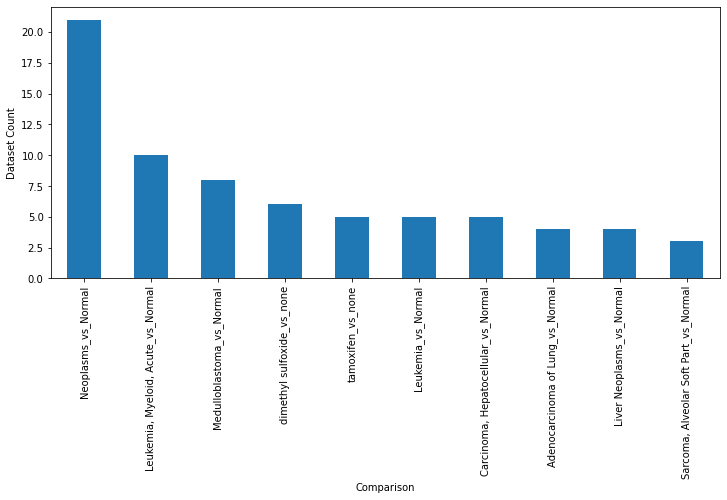

In [57]:
hist_data = df.loc[df['comparison'].isin(df['comparison'].value_counts().head(10).index),['dataset_id','comparison']]
hist_data = hist_data.sort_values(by='comparison')
plt.figure(figsize=(12, 5))
hist_data['comparison'].value_counts().plot(kind="bar")
plt.xlabel('Comparison') 
plt.ylabel('Dataset Count')
plt.show()

### 2. Rank comparisons with fisher's exact test

In [59]:
import numpy as np

In [60]:
total_comparisons_in_gdx['interesting_dataset'] = 0
total_comparisons_in_gdx.loc[total_comparisons_in_gdx['dataset_id'].isin(df['dataset_id']),'interesting_dataset'] = 1
total_comparisons_in_gdx.head()

,dataset_id,comparison,interesting_dataset
0,GSE119157_GPL24247-2022-07-08-06-17-20,(R)-noradrenaline_vs_none,0
1,GSE119167_GPL17543-2022-06-21-07-52-17,Myeloid splenomegaly_vs_Normal,0
2,GSE119169_GPL17543-2022-06-21-07-52-18,Myeloid splenomegaly_vs_Normal,0
3,GSE119207_GPL16686-2022-06-21-07-52-20,"Lupus Erythematosus, Discoid_vs_Normal",0
4,GSE119265_GPL18573-2022-06-21-07-52-21,Pre-Eclampsia_vs_Normal,0


In [61]:
from scipy.stats import fisher_exact

def run_fisher_exact_test(df, interesting_comparison):
    j = df.copy()
    j['interesting_comparison']=0
    j.loc[j['comparison']==interesting_comparison,'interesting_comparison'] = 1
    j.loc[j['comparison']!=interesting_comparison,'interesting_comparison'] = 0
    k = j.groupby(['interesting_comparison','interesting_dataset'])['dataset_id'].count().reset_index()
    t = pd.pivot(k, columns='interesting_comparison', values='dataset_id', index='interesting_dataset').fillna(0)
    oddsr, p = fisher_exact(t, alternative='two-sided')
    return oddsr, p

In [78]:
comparisons_list = np.unique(total_comparisons_in_gdx['comparison'])

result = pd.DataFrame({
    'comparison':comparisons_list,
    'oddsr':None,
    'pval':1
})
result.index = comparisons_list
for comparison in comparisons_list:
    oddsr, p = run_fisher_exact_test(total_comparisons_in_gdx, comparison)
    result.loc[comparison,'comparison'] = comparison
    result.loc[comparison,'oddsr'] = oddsr
    result.loc[comparison,'pval'] = p
    
result = result.sort_values(by='pval')
result.head()

,comparison,oddsr,pval
Medulloblastoma_vs_Normal,Medulloblastoma_vs_Normal,28.9244,3.872176e-08
Neoplasms_vs_Normal,Neoplasms_vs_Normal,3.35873,1.000337e-05
"Leukemia, Myeloid, Acute_vs_Normal","Leukemia, Myeloid, Acute_vs_Normal",7.02445,1.013570e-05
"Sarcoma, Alveolar Soft Part_vs_Normal","Sarcoma, Alveolar Soft Part_vs_Normal",inf,9.308946e-05
Leukemia_vs_Normal,Leukemia_vs_Normal,10.6952,3.858369e-04


In [79]:
result.head(10)

,comparison,oddsr,pval
Medulloblastoma_vs_Normal,Medulloblastoma_vs_Normal,28.9244,3.872176e-08
Neoplasms_vs_Normal,Neoplasms_vs_Normal,3.35873,1.000337e-05
"Leukemia, Myeloid, Acute_vs_Normal","Leukemia, Myeloid, Acute_vs_Normal",7.02445,1.013570e-05
"Sarcoma, Alveolar Soft Part_vs_Normal","Sarcoma, Alveolar Soft Part_vs_Normal",inf,9.308946e-05
Leukemia_vs_Normal,Leukemia_vs_Normal,10.6952,3.858369e-04
"Carcinoma, Ovarian Epithelial_vs_Normal","Carcinoma, Ovarian Epithelial_vs_Normal",12.7357,4.394963e-03
"Sarcoma, Ewing_vs_Normal","Sarcoma, Ewing_vs_Normal",42.303,6.001248e-03
Adenocarcinoma of Lung_vs_Normal,Adenocarcinoma of Lung_vs_Normal,6.54887,6.224645e-03
Liver Neoplasms_vs_Normal,Liver Neoplasms_vs_Normal,6.07985,7.721998e-03
imiquimod_vs_none,imiquimod_vs_none,9.09317,8.800991e-03


In [80]:
result['negLog10pval'] = -np.log10(result['pval'])
result.head()

,comparison,oddsr,pval,negLog10pval
Medulloblastoma_vs_Normal,Medulloblastoma_vs_Normal,28.9244,3.872176e-08,7.412045
Neoplasms_vs_Normal,Neoplasms_vs_Normal,3.35873,1.000337e-05,4.999854
"Leukemia, Myeloid, Acute_vs_Normal","Leukemia, Myeloid, Acute_vs_Normal",7.02445,1.013570e-05,4.994146
"Sarcoma, Alveolar Soft Part_vs_Normal","Sarcoma, Alveolar Soft Part_vs_Normal",inf,9.308946e-05,4.031099
Leukemia_vs_Normal,Leukemia_vs_Normal,10.6952,3.858369e-04,3.413596


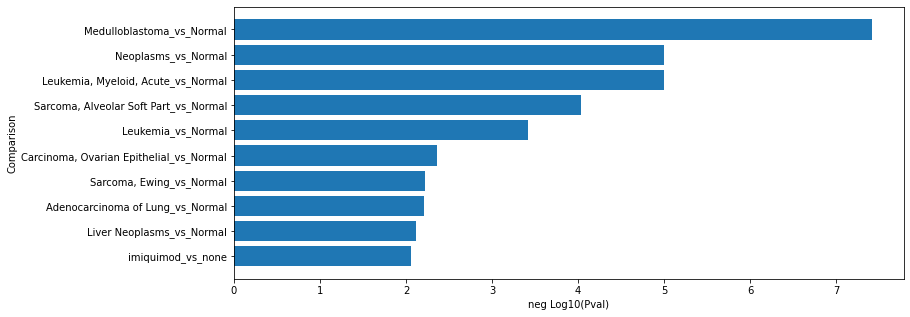

In [85]:
df = result.head(10)
df = df.sort_values(by='negLog10pval')
plt.figure(figsize=(12, 5))
plt.barh(df["comparison"], df["negLog10pval"])
plt.ylabel('Comparison') 
plt.xlabel('neg Log10(Pval)')
plt.show()